<a href="https://colab.research.google.com/github/MahdiNouraie/CNN-FashionMNIST/blob/main/Resnet50_FashionMNIST_1Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install cloud-tpu-client==0.10 torch==1.11.0 https://storage.googleapis.com/tpu-pytorch/wheels/colab/torch_xla-1.11-cp37-cp37m-linux_x86_64.whl

In [ ]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch_xla
import torch_xla.core.xla_model as xm
from matplotlib import pyplot

In [ ]:
transform = transforms.Compose([ transforms.Resize((224,224)),  transforms.Lambda(lambda image: image.convert('RGB')), transforms.ToTensor() , transforms.Normalize((0.5,) , (0.5,) , )])

In [ ]:
trainset = datasets.FashionMNIST('~/ .pytorch/F_MNIST_data' , download= True , transform= transform , train= True)
testset = datasets.FashionMNIST('~/ .pytorch/F_MNIST_data' , download= True , transform= transform , train= False)

In [ ]:
print(len(trainset))
print(len(testset))

60000
10000


In [ ]:
trainset[0][0].shape

torch.Size([3, 224, 224])

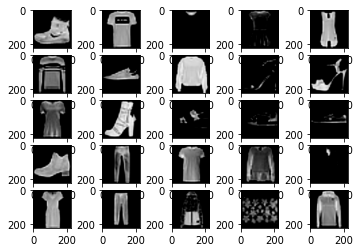

In [ ]:
for i in range(25):
	pyplot.subplot(5, 5, i+1)
	pyplot.imshow(trainset[i][0].permute(1,2,0))
pyplot.show()

In [ ]:
train_sampler = torch.utils.data.RandomSampler(trainset)
test_sampler = torch.utils.data.RandomSampler(testset)

In [ ]:
batch_size = 16
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, sampler=train_sampler)
test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size, sampler=test_sampler)

In [ ]:
device = xm.xla_device()
device

device(type='xla', index=1)

In [ ]:
net = torchvision.models.resnet50(num_classes=10)
net = net.to(device)

In [ ]:
class_map = {
0 : "t-shirt",
1 : "trouser",
2 : "pullover",
3 : "dress",
4 : "coat",
5 : "sandal",
6 : "shirt",
7 : "sneaker",
8 : "bag",
9 : "ankle boot"}

In [ ]:
import os
import time
from google.colab import widgets

t_to_img = transforms.Compose([transforms.ToPILImage(), transforms.Grayscale()])

def eval_network(net, test_loader):
  start_time = time.time()
  num_correct = 0
  total_guesses = 0

  # Sets eval and no grad context for evaluation
  net.eval()
  with torch.no_grad():
    for data, targets in iter(test_loader):
      # Sends data and targets to device
      data = data.to(device)
      targets = targets.to(device)

      # Acquires the network's best guesses at each class
      results = net(data)
      best_guesses = torch.argmax(results, 1)

      # Updates number of correct and total guesses
      num_correct += torch.eq(targets, best_guesses).sum().item()
      total_guesses += batch_size
    
    # Prints output
    elapsed_time = time.time() - start_time
    print("Correctly guessed ", num_correct/total_guesses*100, "% of the dataset")
    print("Evaluated in ", elapsed_time, " seconds")
    print("Sample batch:")
    
    # Uses last batch as sample
    grid = widgets.Grid(4, 4)
    row = 0
    col = 0
    for ex in zip(data, targets, best_guesses):
      data = ex[0].cpu()
      target = class_map[ex[1].item()]
      guess = class_map[ex[2].item()]

      img = t_to_img(data)

      with grid.output_to(row, col):
        display(img)
        print("Target: ", target)
        print("Guess: ", guess)

        # Updates grid location
        if col == 3:
          row += 1
          col = 0
        else:
          col += 1

Correctly guessed  12.11 % of the dataset
Evaluated in  97.02304792404175  seconds
Sample batch:


,,,
,,,
,,,
,,,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

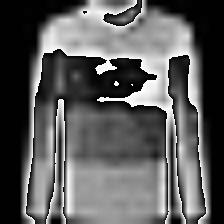

Target:  pullover
Guess:  bag


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

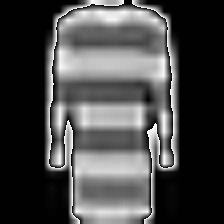

Target:  dress
Guess:  bag


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

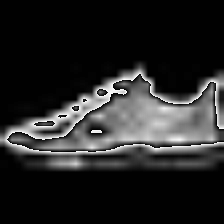

Target:  sneaker
Guess:  sandal


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

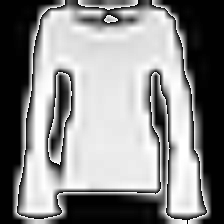

Target:  pullover
Guess:  sandal


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

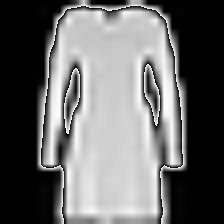

Target:  dress
Guess:  sandal


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

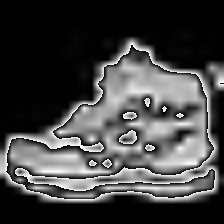

Target:  ankle boot
Guess:  sandal


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

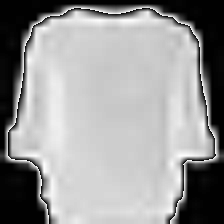

Target:  t-shirt
Guess:  sandal


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

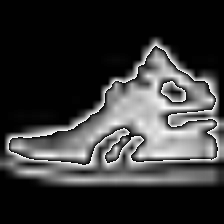

Target:  sneaker
Guess:  sandal


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

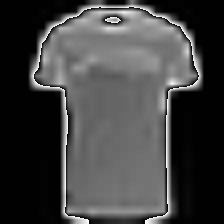

Target:  t-shirt
Guess:  bag


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

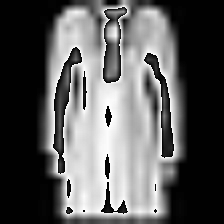

Target:  dress
Guess:  bag


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

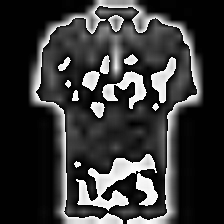

Target:  t-shirt
Guess:  trouser


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

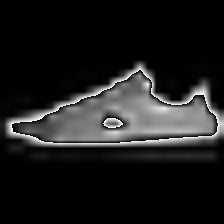

Target:  sneaker
Guess:  sandal


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

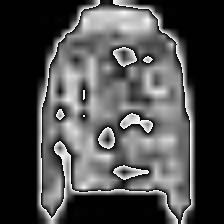

Target:  coat
Guess:  bag


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

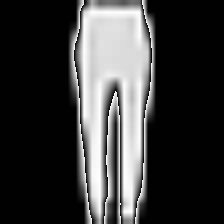

Target:  trouser
Guess:  sandal


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

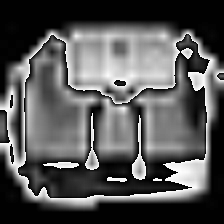

Target:  bag
Guess:  sandal


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

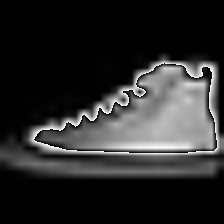

Target:  sneaker
Guess:  sandal


<IPython.core.display.Javascript object>

In [ ]:
eval_network(net, test_loader)

In [ ]:
import os
import time
from google.colab import widgets

t_to_img = transforms.Compose([transforms.ToPILImage(), transforms.Grayscale()])

def eval_n(net, test_loader):
  start_time = time.time()
  num_correct = 0
  total_guesses = 0

  # Sets eval and no grad context for evaluation
  net.eval()
  with torch.no_grad():
    for data, targets in iter(test_loader):
      # Sends data and targets to device
      data = data.to(device)
      targets = targets.to(device)

      # Acquires the network's best guesses at each class
      results = net(data)
      best_guesses = torch.argmax(results, 1)

      # Updates number of correct and total guesses
      num_correct += torch.eq(targets, best_guesses).sum().item()
      total_guesses += batch_size
    
    return num_correct/total_guesses*100

In [ ]:
print(eval_n(net, test_loader))

12.11


In [ ]:
num_epochs = 1
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters())

# Ensures network is in train mode
net.train()
train_acc = [] ; test_acc = []
start_time = time.time()
for epoch in range(num_epochs):
  for data, targets in iter(train_loader):
    # Sends data and targets to device
    data = data.to(device)
    targets = targets.to(device)

    # Acquires the network's best guesses at each class
    results = net(data)

    # Computes loss
    loss = loss_fn(results, targets)
 #   train_acc.append(eval_n(net, train_loader))
 #   test_acc.append(eval_n(net, test_loader))


    # Updates model
    optimizer.zero_grad()
    loss.backward()
    xm.optimizer_step(optimizer, barrier=True)  # Note: Cloud TPU-specific code!

elapsed_time = time.time() - start_time
print ("Spent ", elapsed_time, " seconds training for ", num_epochs, " epoch(s) on a single core.")

Spent  698.2957518100739  seconds training for  1  epoch(s) on a single core.


In [ ]:
print(eval_n(net, test_loader))

87.63


In [ ]:
num_epochs = 5
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters())

# Ensures network is in train mode
net.train()
#train_acc = [] ; test_acc = []
start_time = time.time()
for epoch in range(num_epochs):
  for data, targets in iter(train_loader):
    # Sends data and targets to device
    data = data.to(device)
    targets = targets.to(device)

    # Acquires the network's best guesses at each class
    results = net(data)

    # Computes loss
    loss = loss_fn(results, targets)
 #   train_acc.append(eval_n(net, train_loader))
#  test_acc.append(eval_n(net, test_loader))


    # Updates model
    optimizer.zero_grad()
    loss.backward()
    xm.optimizer_step(optimizer, barrier=True)  # Note: Cloud TPU-specific code!

elapsed_time = time.time() - start_time
print ("Spent ", elapsed_time, " seconds training for ", num_epochs, " epoch(s) on a single core.")

Spent  3349.7301771640778  seconds training for  5  epoch(s) on a single core.


In [ ]:
print(eval_n(net, test_loader))

91.27


In [ ]:
import numpy as np
new =  testset[3030][0]
new = np.expand_dims(new, axis = 0)
new = torch.Tensor(new)
new = new.to(device)
new.shape

torch.Size([1, 3, 224, 224])

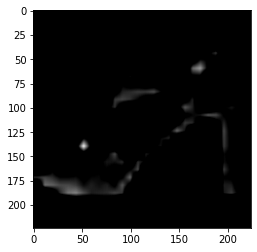

In [ ]:
	pyplot.imshow(trainset[3030][0].permute(1,2,0))

In [ ]:
results = net(new)
best_guesses = torch.argmax(results, 1)
class_map[int(best_guesses)]

'sneaker'

In [ ]:
class_map[int(testset[3030][1])]

'sneaker'